<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Image_Data_Conversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image-Data Conversions**

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# just to allow imshow function in colab, cv2.imshow() doesn't work in colab, use google.colab.patches.cv2_imshow() instead.
from google.colab.patches import cv2_imshow # cv.imshow()
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


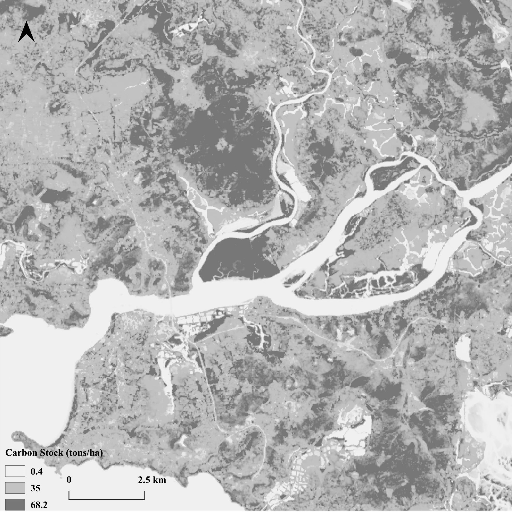

In [ ]:
drive.mount("/content/drive")
path = "/content/drive/My Drive/Estimating+carbon+from+an+NDVI+map.jpg"

# Read image as grayscale image 
im = cv.imread(path,cv.IMREAD_GRAYSCALE)
im = cv.resize(im, dsize=(512, 512))
cv2_imshow(im)

## To Numpy Array

In [ ]:
IMG = np.array(im)
IMG


array([[185, 168, 145, ..., 188, 190, 187],
       [157, 137, 116, ..., 185, 189, 189],
       [131, 128, 118, ..., 190, 191, 188],
       ...,
       [239, 240, 240, ..., 237, 234, 235],
       [243, 245, 244, ..., 243, 240, 240],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

## From Numpy Array to List

In [ ]:
IMG_f = IMG.flatten()
IMG_f

array([185, 168, 145, ..., 254, 254, 254], dtype=uint8)

## To Pandas Data Frame

In [ ]:
df_IMG = pd.DataFrame(IMG_f)
df_IMG

,0
0,185
1,168
2,145
3,164
4,162
...,...
262139,254
262140,254
262141,254
262142,254


However, this dimensionality does not fulfill our demands: We want an image as a row rather than a column.

## Flip Matrix

In [ ]:
IMG_f_r = IMG_f.reshape(1, -1)
IMG_f_r

array([[185, 168, 145, ..., 254, 254, 254]], dtype=uint8)

In [ ]:
df_IMG_2 = pd.DataFrame(IMG_f_r)
df_IMG_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,262104,262105,262106,262107,262108,262109,262110,262111,262112,262113,262114,262115,262116,262117,262118,262119,262120,262121,262122,262123,262124,262125,262126,262127,262128,262129,262130,262131,262132,262133,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,185,168,145,164,162,119,119,119,119,119,119,119,119,119,118,120,118,117,128,127,140,150,147,156,158,177,182,189,192,194,194,194,194,194,192,189,193,199,210,197,...,253,253,250,251,251,251,253,253,253,252,252,252,253,250,252,250,252,250,252,252,252,252,254,253,252,252,253,253,253,253,254,254,253,252,253,254,254,254,254,254


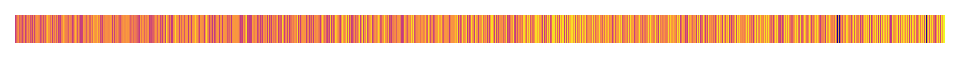

In [ ]:
plt.figure(figsize=(8, 0.25), dpi=150)

pos_x = []
for i in range(0, len(IMG_f)):
  pos_x.append(i)

pos_y = [0]* len(IMG_f)

plt.scatter(pos_x, pos_y, marker='|', c=IMG_f_r) 
plt.pcolormesh(IMG_f_r, cmap='plasma')
plt.axis('off')

SAVING_PATH = "/content/drive/My Drive"
plt.savefig(SAVING_PATH + '/strip.png', dpi=150) # must to be placed before plt.show()

plt.show()

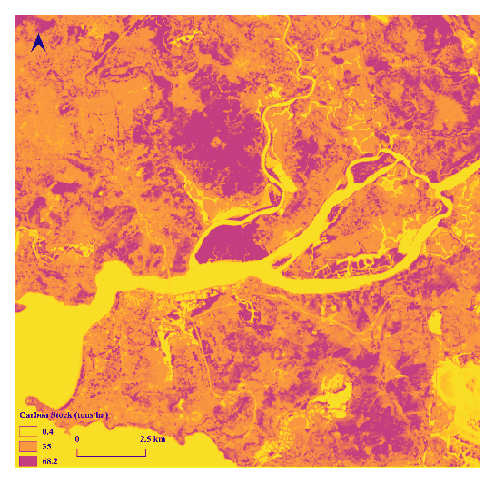

In [ ]:
RE = np.array_split(IMG_f, 512) # split the list into 512 sub-lists

import seaborn as sns
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
sns.heatmap(RE, cmap='plasma', cbar=False, annot=False)